In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtsrb-german-traffic-sign/Meta.csv
/kaggle/input/gtsrb-german-traffic-sign/Train.csv
/kaggle/input/gtsrb-german-traffic-sign/Test.csv
/kaggle/input/gtsrb-german-traffic-sign/Meta/37.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/35.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/11.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/31.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/4.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/40.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/33.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/9.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/.~lock.ClassesInformation.ods#
/kaggle/input/gtsrb-german-traffic-sign/Meta/14.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/1.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/39.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/20.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/38.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/2.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/10.png


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [3]:
data_dir = '../input/gtsrb-german-traffic-sign'
train_path = '../input/gtsrb-german-traffic-sign/Train'
test_path = '../input/gtsrb-german-traffic-sign/'

# Resizing the images to 28x28x3
IMG_HEIGHT = 28
IMG_WIDTH = 28
channels = 3

In [4]:
category_counts = len(os.listdir(train_path))
category_counts

43

In [5]:
# Etikettenübersicht
classes_de = { 0:'Geschwindigkeitsbegrenzung (20km/h)',
            1:'Geschwindigkeitsbegrenzung (30km/h)',
            2:'Geschwindigkeitsbegrenzung (50km/h)',
            3:'Geschwindigkeitsbegrenzung (60km/h)',
            4:'Geschwindigkeitsbegrenzung (70km/h)',
            5:'Geschwindigkeitsbegrenzung (80km/h)',
            6:'Ende Geschwindigkeitsbegrenzung (80km/h)',
            7:'Geschwindigkeitsbegrenzung (100km/h)',
            8:'Geschwindigkeitsbegrenzung (120km/h)',
            9:'Kein Passieren',
            10:'Kein Überholen von Fahrzeugen über 3,5 Tonnen',
            11:'Vorfahrt an Kreuzung',
            12:'Vorfahrtstraße',
            13:'Ertrag',
            14:'Halt',
            15:'Keine Fahrzeuge',
            16:'Fahrzeug > 3,5 Tonnen verboten',
            17:'Kein Eintrag',
            18:'Allgemeine Vorsicht',
            19:'Gefährliche Kurve links',
            20:'Gefährliche Kurve rechts',
            21:'Doppelkurve',
            22:'Holprige Straße',
            23:'Glatte Straße',
            24:'Straße verengt sich rechts',
            25:'Straßenarbeiten',
            26:'Ampeln',
            27:'Fußgänger',
            28:'Kinder überqueren',
            29:'Fahrradkreuzung',
            30:'Vorsicht Eis/Schnee',
            31:'Wilde Tiere überqueren',
            32:'Endgeschwindigkeit + Grenzüberschreitung',
            33:'Rechts abbiegen',
            34:'Voraus links abbiegen',
            35:'Nur voraus',
            36:'Gehen Sie geradeaus oder rechts',
            37:'Gehen Sie geradeaus oder links',
            38:'Rechts halten',
            39:'Links halten',
            40:'Kreisverkehr obligatorisch',
            41:'Ende des Passverbots',
            42:'Ende kein Überholen von Fahrzeugen > 3,5 Tonnen' }

In [6]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [7]:

# Etikete Genel Bakış
classes_tr = { 0:'Hız sınırı (20km/s)',
            1:'Hız sınırı (30km/s)',
            2:'Hız sınırı (50km/s)',
            3:'Hız sınırı (60km/s)',
            4:'Hız sınırı (70km/s)',
            5:'Hız sınırı (80km/s)',
            6:'Hız sınırının sonu (80km/s)',
            7:'Hız sınırı (100km/s)',
            8:'Hız sınırı (120km/s)',
            9:'Geçmek yok',
            10:'3,5 tonu geçen araç giremez',
            11:'Kavşakta geçiş hakkı',
            12:'Öncelikli yol',
            13:'Verim',
            14:'Dur',
            15:'Araç yok',
            16:'3,5 ton büyük araçlara yasak',
            17:'Giriş yok',
            18:'Genel uyarı',
            19:'Sola tehlikeli viraj',
            20:'Sağa Tehlikeli viraj',
            21:'Çift eğri',
            22:'Engebeli yol',
            23:'Kaygan yol',
            24:'Yol sağda daralıyor',
            25:'Yol çalışması',
            26:'Trafik sinyalleri',
            27:'Yayalar',
            28:'Çocuklar karşıya geçiyor',
            29:'Bisiklet geçişi',
            30:'Buz/kardan sakının',
            31:'Vahşi hayvanların geçişi',
            32:'Hız ve geçiş limitleri sonu',
            33:'Sağa dön',
            34:'ileriden sola dön',
            35:'Yalnızca önde',
            36:'Düz veya sağa git',
            37:'Düz veya sola gidin',
            38:'Sağdan git',
            39:'Sola git',
            40:'Döner kavşak zorunlu',
            41:'Geçmenin sonu',
            42:'3,5 ton büyük araçlara sollama yasağı sonu' } 

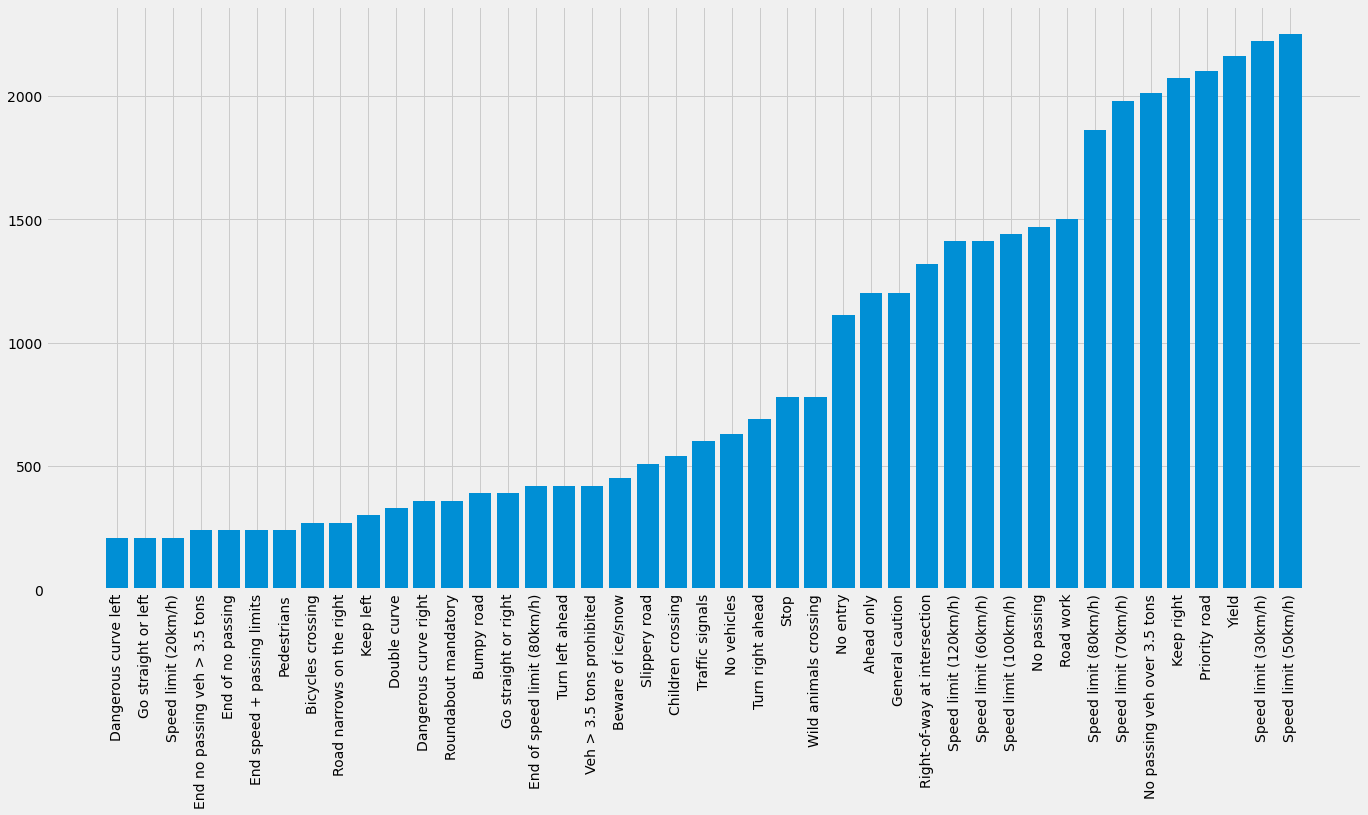

In [8]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

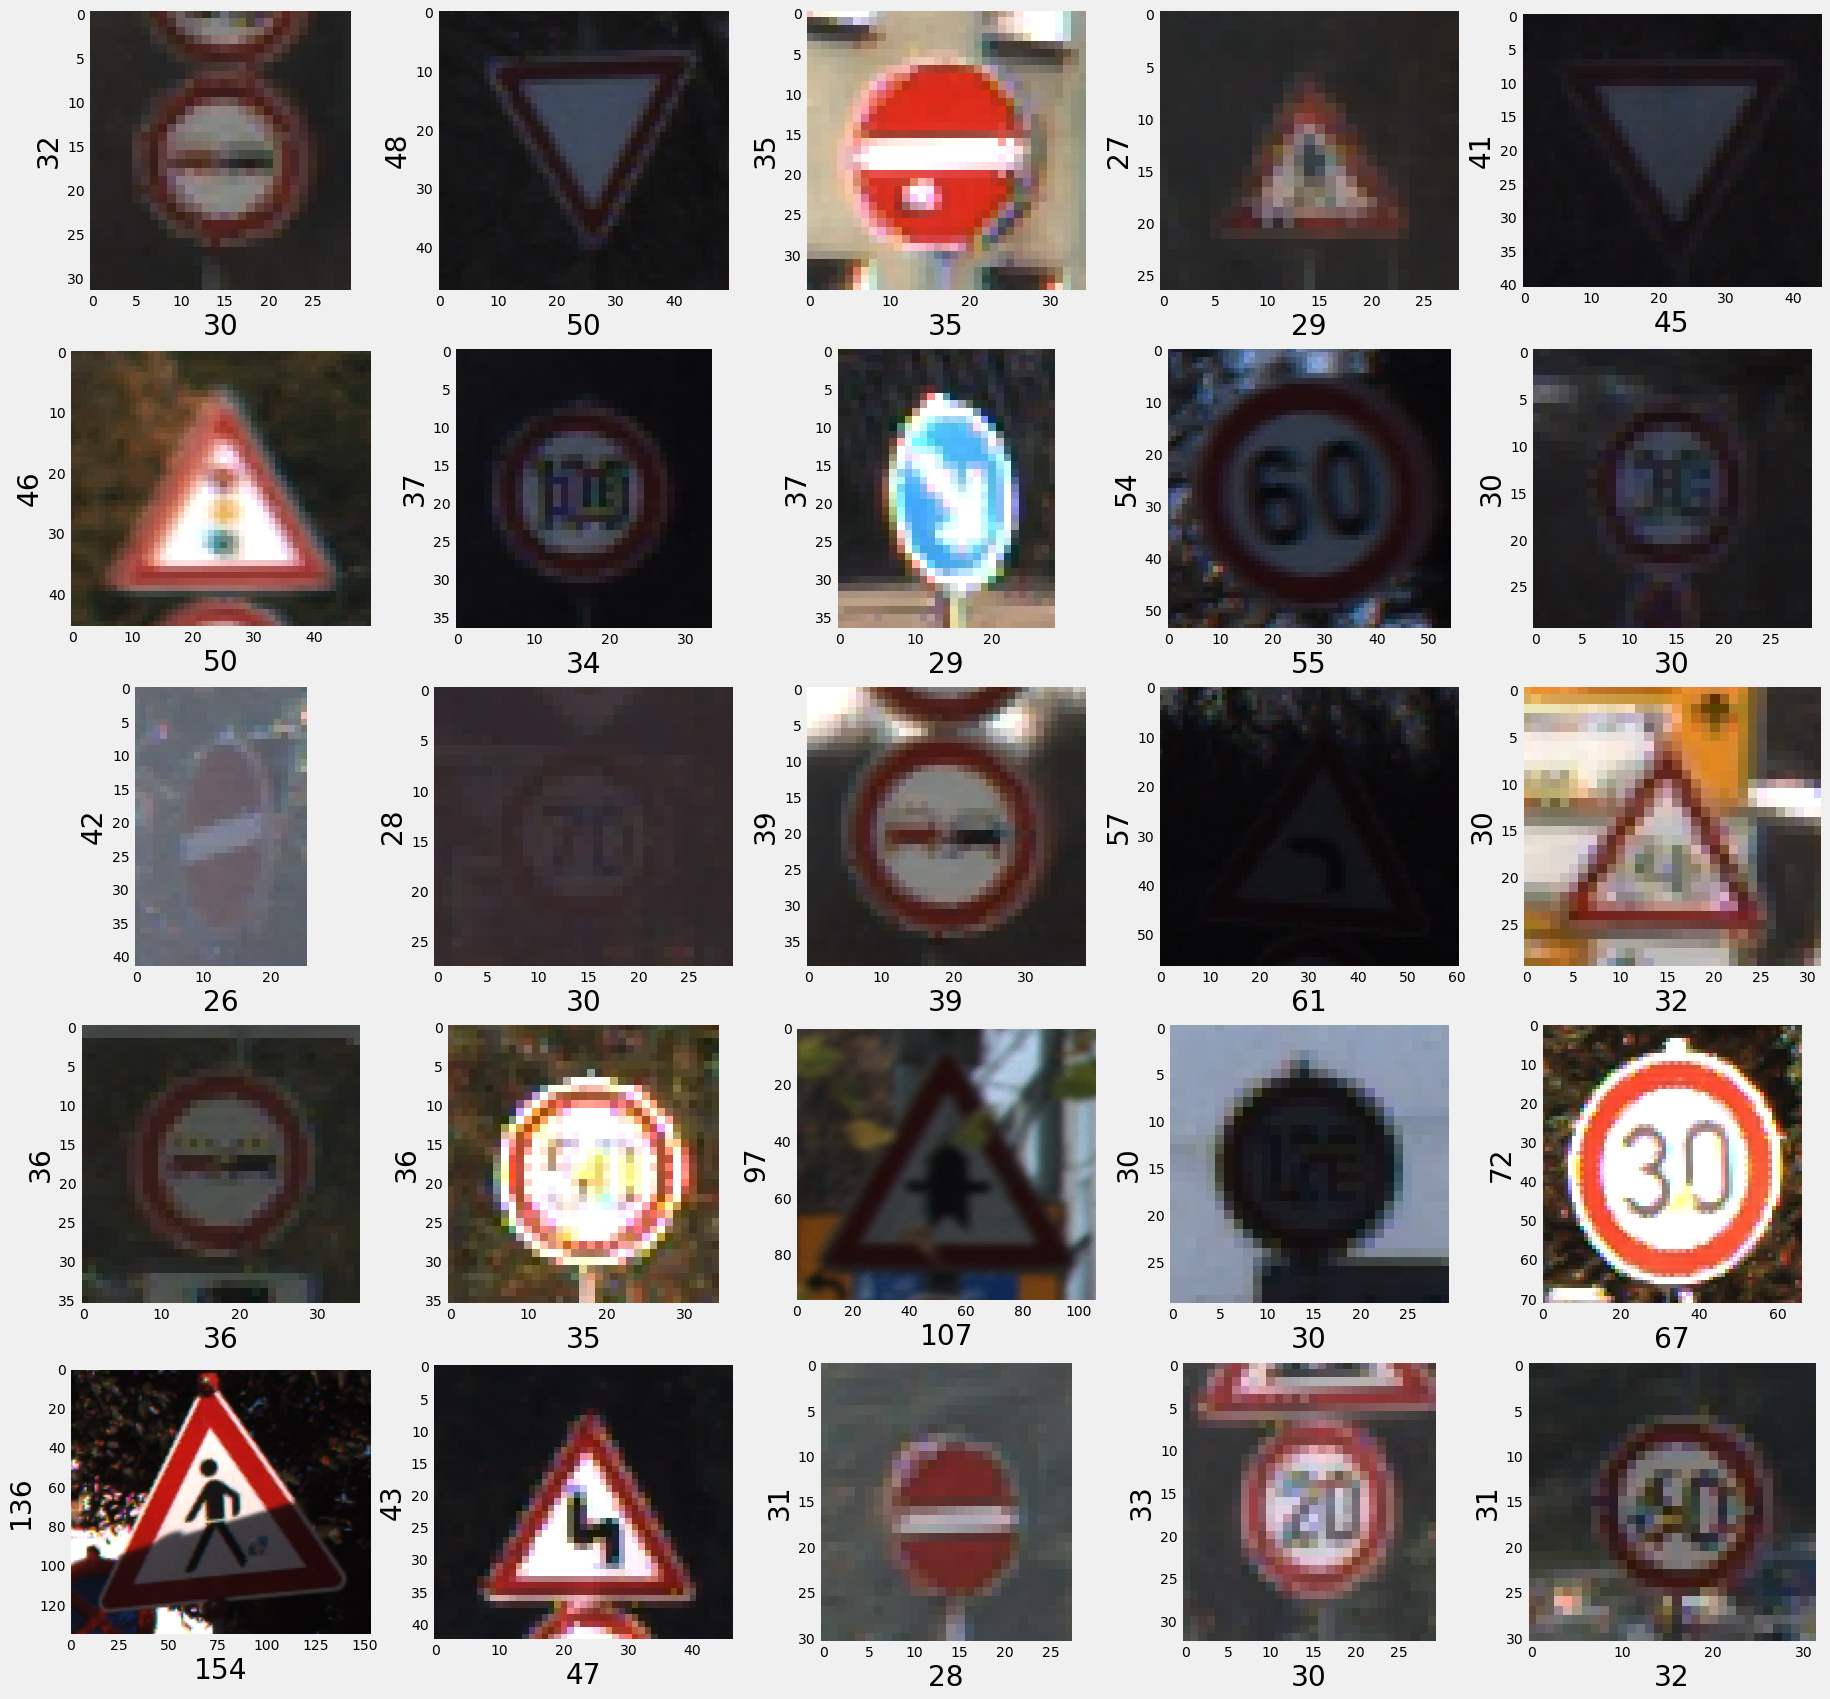

In [9]:
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(28,28))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 28)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 28)#height of image

In [10]:
image_data = []
image_labels = []

for i in range(category_counts):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 28, 28, 3) (39209,)


In [11]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [12]:
x_train, x_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

x_train = x_train/255 
x_val = x_val/255

print("x_train.shape", x_train.shape)
print("x_valid.shape", x_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

x_train.shape (27446, 28, 28, 3)
x_valid.shape (11763, 28, 28, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [13]:
y_train = keras.utils.to_categorical(y_train, category_counts)
y_val = keras.utils.to_categorical(y_val, category_counts)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [14]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [15]:
lr = 0.001
epochs = 30

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [16]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(x_train, y_train, batch_size=32), epochs=epochs, validation_data=(x_val, y_val))

2022-01-16 13:20:53.733237: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
858/858 [==============================] - 53s 60ms/step - loss: 1.0626 - accuracy: 0.7113 - val_loss: 0.0642 - val_accuracy: 0.9809
Epoch 2/30
858/858 [==============================] - 50s 58ms/step - loss: 0.1847 - accuracy: 0.9424 - val_loss: 0.0314 - val_accuracy: 0.9912
Epoch 3/30
858/858 [==============================] - 50s 59ms/step - loss: 0.1089 - accuracy: 0.9662 - val_loss: 0.0244 - val_accuracy: 0.9923
Epoch 4/30
858/858 [==============================] - 50s 59ms/step - loss: 0.0871 - accuracy: 0.9727 - val_loss: 0.0198 - val_accuracy: 0.9945
Epoch 5/30
858/858 [==============================] - 51s 59ms/step - loss: 0.0659 - accuracy: 0.9796 - val_loss: 0.0200 - val_accuracy: 0.9940
Epoch 6/30
858/858 [==============================] - 51s 59ms/step - loss: 0.0556 - accuracy: 0.9827 - val_loss: 0.0187 - val_accuracy: 0.9943
Epoch 7/30
858/858 [==============================] - 51s 59ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0054 - val_accuracy:

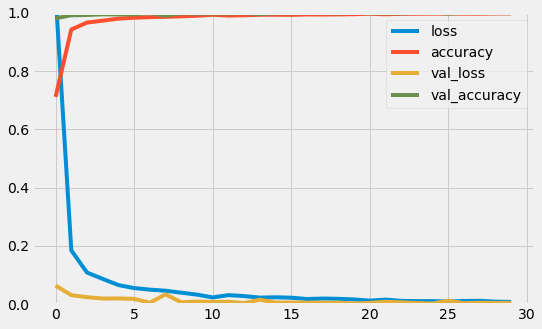

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("error in " + img)
x_test = np.array(data)
x_test = x_test/255

pred = model.predict_classes(x_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(x_test[start_index + i])
plt.show()